# Introduction
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

##### Source

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations
Total: 1190 observations Duplicated: 272 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

# Problem/Overview
Using this (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/download?datasetVersionNumber=1) dataset, we are to design a Machine Learning model that will correctly if given the inputs, predict whether a person has heart disease or not.

This is a type of Logistic problem, and we are going to use a classification model to derive our solution, that is we are going to design a model that will correctly predict whether a person is having heart disease or not. The dataset consist of twelve columns, in which the first eleven columns are the independent features, while the last column is the dependent feature.

##### Attribute Information
Age: The age of the patient, in years.

Sex: The patient's gender, M or F.

ChestPainType: The type of chest pain experienced by the patient.

- TA: Typical Angina
- ATA: Atypical Angina
- NAP: Non-Anginal Pain
- ASY: Asymptomatic

RestingBP: The patient's resting blood pressure in mmHg.

Cholesterol: The patient's serum cholesterol in mg/dl.

FastingBS: The patient's fasting blood sugar.

- 1 if glucose is greater than 120 mg/dl
- 0 if not

RestingECG: The patient's resting ECG.

- Normal
- ST : having ST-T wave abnormality
- LVH : showing probable or definite left ventricular hypertrophy

MaxHR: The patient's maximum heart rate achieved in beats per min.

ExerciseAngina: Exercise induced angina, yes or no.

Oldpeak: The patient's numeric measure of ST depression induced by exercise relative to rest.

ST_Slope: The slope of the peak exercise ST segment.

- Up : upsloping
- Flat 
- Down : downsloping

HeartDisease: Output class

- 1 : heart disease
- 0 : normal

# Data Exploration
First, we are going to import the libraries and dataset required for this model.

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import datetime
from datetime import datetime

import seaborn as sns

# Allows the use of display() for dataframes.
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from collections import Counter

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [6]:
#importing dataset
heart = pd.read_csv('heart.csv')

# Checking for loading success
display(heart.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
heart.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [8]:
heart.shape

(918, 12)

In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
# Checking for duplicated and/or null values
heart.duplicated().sum()

0

In [12]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


From the data above, we can see that we have 0's in our dataset which is not really accurate. You can't have a restingBP of 0 nor cholesterol of 0. We also need to fix the negative values in the Oldpeak column.

In [15]:
# Changing FastingBS into string as it is really a categorical variable
heart['FastingBS'] = heart['FastingBS'].astype(str)

In [16]:
# Cleaning cholesterol by replacing 0 with the mean
heart['Cholesterol'] = heart['Cholesterol'].replace(0, heart['Cholesterol'].mean())

In [17]:
# Cleaning RestingBP by replacing 0 with mean
heart['RestingBP'] = heart['RestingBP'].replace(0, heart['RestingBP'].mean())

In [18]:
# Cleaning the column Oldpeak to get rid of outliers
heart = heart[heart['Oldpeak'] >= 0]

# Visualizations

Now that we have a clean dataset, we can perform our exploratory data analysis, EDA for short. There are a number of ways on how we can perform EDA.

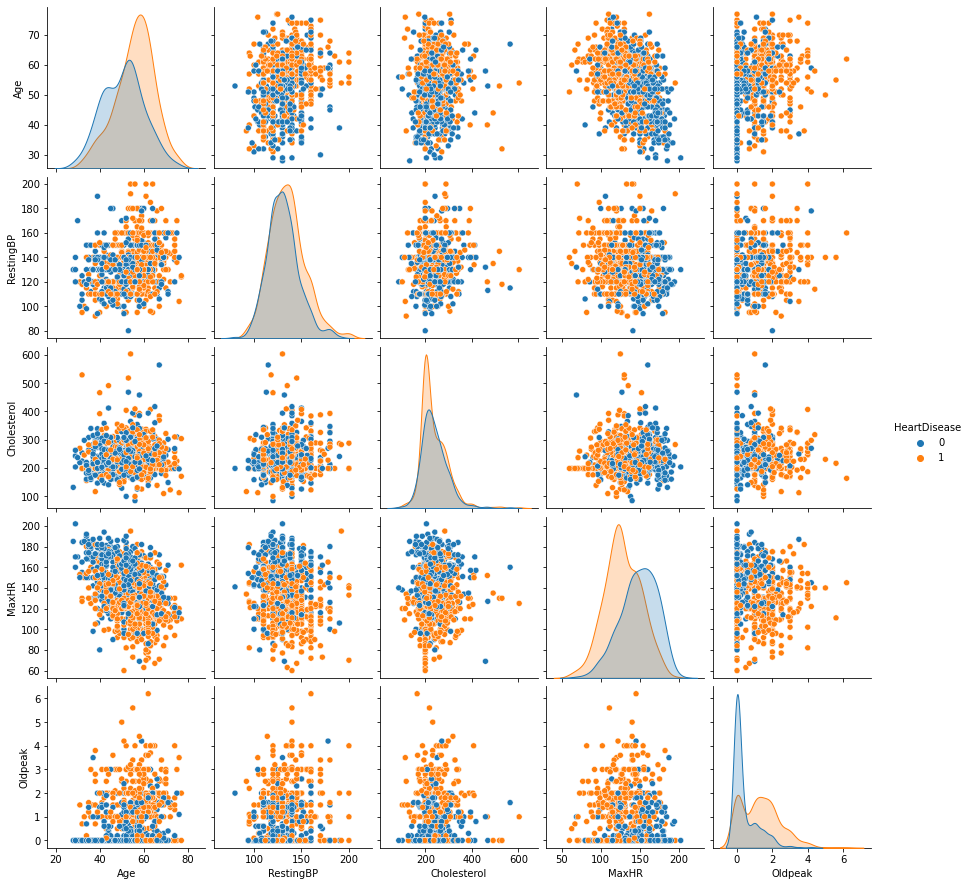

In [22]:
sns.pairplot(heart,hue="HeartDisease")

From the pairplot, we can see that the chances of heart disease are higher for people in the following categories:

1. Older people
2. People with higher resting blood pressure.
3. People with a higher cholesterol level.
4. Older people with high OldPeak numbers.
5. Older people with higher cholesterol.
6. People with high max HR.

A limitation of pairplots is we are subjected to use only continuous variables. So for the categorical variable ChestPainType we are going to use a boxplot to see if we can see a relationship.

In [23]:
chest_pain_type = heart.groupby('ChestPainType')['HeartDisease'].value_counts(normalize = True)
chest_pain_type = chest_pain_type.mul(100).rename('Percentage').reset_index()

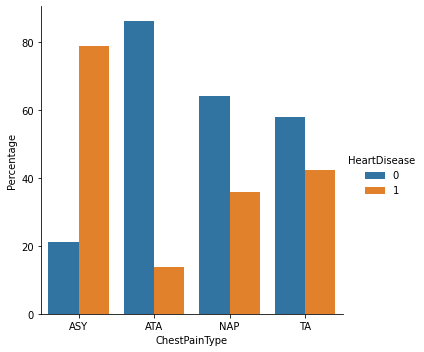

In [25]:
sns.catplot(x="ChestPainType", y="Percentage", hue="HeartDisease", kind="bar", data=chest_pain_type)

By looking at the above chart, we can see that not because a person is asymptomatic that doesn't mean they don't have a risk of having a heart disease. We've expected a low chance of heart disease for people experiencing atypical angina. Why is that? Atypical angina is used to describe pain that does not fit the typical representation. Instead of it being heart related, most causes of atypical angina is brought on by respiratory, musculoskeletal, and gastrointestinal diseases. 

We may confuse non anginal pain with heart disease as you usually feel it behind the breast bone and resembles heart pain. It is usually caused by muscle or bone problems, lung problems, and sometimes stomach problems such as ulcers. That is why there is a lower chance of heart disease for people that experienced non anginal pain. Typical anginal pain represents heart disease and that is why the chances of a person having a heart disease or not is close.

In [26]:

fasting_bs = heart.groupby('FastingBS')['HeartDisease'].value_counts(normalize = True)
fasting_bs = fasting_bs.mul(100).rename('Percentage').reset_index()

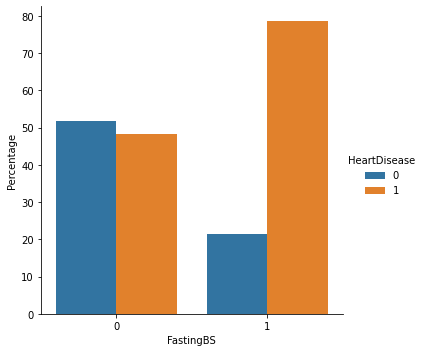

In [27]:
sns.catplot(x="FastingBS", y="Percentage", hue="HeartDisease", kind="bar", data=fasting_bs)

Too much blood sugar can contribute to a build up of plaque in your arteries, which can eventually restrict the amount of blood flowing to your vital organs. Heart disease can occur as a result. The chart above clearly shows that someone with a FastingBS of higher than 120 mg/dl has a high chance of getting heart disease.


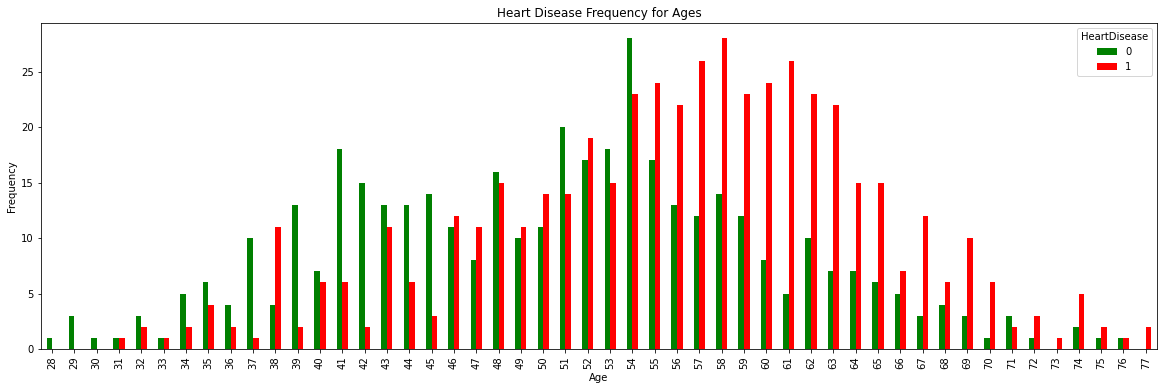

In [30]:
pd.crosstab(heart.Age,heart.HeartDisease).plot(kind="bar",figsize=(20,6),color= ['green','red'])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Heart diseases rising the ages between 45-68.

In [40]:
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


def plot_bar(df, subplot_titles, feature, plot_title, ncols = 5, width = 1500, height = 500):
    
    fig = make_subplots(rows = 1, cols = ncols, subplot_titles = subplot_titles, x_title = 'Heart Disease', y_title = 'Count', shared_yaxes='all')

    col_inc = 1
    for subtype in subplot_titles:
        bar_dict = df[df[feature] == subtype]['HeartDisease'].value_counts().to_dict()
        fig.add_trace(go.Bar(x = list(bar_dict.keys()), y = list(bar_dict.values()), name = subtype), row = 1, col = col_inc)

        col_inc = col_inc + 1

    fig.update_layout(width = width, height = height, title = plot_title)

    fig.show()

In [42]:
plot_bar(heart, subplot_titles = list(heart['Sex'].value_counts(ascending = False).index), feature = 'Sex', ncols = 2, plot_title = 'Different types of genders', width = 1000, height = 600)

About 63% of males were diagnosed with heart disease and remaining 37% didn't.
Only 26% of females were diagnosed with heart disease and remaning 74% didn't.

In [44]:
plot_bar(heart, subplot_titles = list(heart['ChestPainType'].value_counts(ascending = False).index), ncols = 4, feature = 'ChestPainType', plot_title = 'Different types of chest pains')

It is clearly evident that, most of the patients who experienced asymptomatic chest pain are diagnosed with heart attack while the least being typical angina.
About 79% of patients who experienced asymptomatic chest pain gor heart disease while the remaining 21% didn't get one.

In [46]:
plot_bar(heart, subplot_titles = list(heart['RestingECG'].value_counts(ascending = False).index), ncols = 3, feature = 'RestingECG', plot_title = 'Different types RestingECG')

RestingECG is a test that measures the electrical activity of the heart. '
LVH, Left Ventricular Hypertrophy, is a thickening of the wall of the heart's main pumping chamber may result in elevation of pressure within the heart and sometimes poor pumping action.¶

In [48]:
plot_bar(heart, subplot_titles = list(heart['ST_Slope'].value_counts(ascending = False).index), ncols = 3, feature = 'ST_Slope', plot_title = 'Different types ST_Slope')

An ST-elevation myocardial infarction (STEMI) is a type of heart attack that mainly affects your heart's lower chambers.
They are named for how they change the appearance of your heart's electrical activity on a certain type of diagnostic test.
When the ST Slope is Flat, there are more cases of a heart disease, about 83%.
When the ST Slope if Upsloping, about 80% of the times, according to our dataset we can say that the patient won't getting a Heart Disease.

In [50]:
plot_bar(heart, subplot_titles = list(heart['FastingBS'].value_counts(ascending = False).index), ncols = 2, feature = 'FastingBS', plot_title = 'Different types of FastingBS', width = 800, height = 500)

According to our dataset, when the fasting blood sugar is below 121 mg/dl, about 48% of the paitents were diagnosed with a heart disease.
When fasting blood sugar is greater 120 mg/dl, about 79% of the patients were diagnosed with a heart disease.

In [51]:
plot_bar(heart, subplot_titles = list(heart['ExerciseAngina'].value_counts(ascending = False).index), ncols = 2, feature = 'ExerciseAngina', plot_title = 'Different types of ExerciseAngina', width = 800, height = 500)

Exercise Angina is a type of chest pain caused by reduced blood flow to the heart.
When exercise angina is Yes, our data shows, about 85% of the patients were diagnosed with a heart disease.
In the absence of angine, only 35% of the patients were diagnosed with a heart disease.

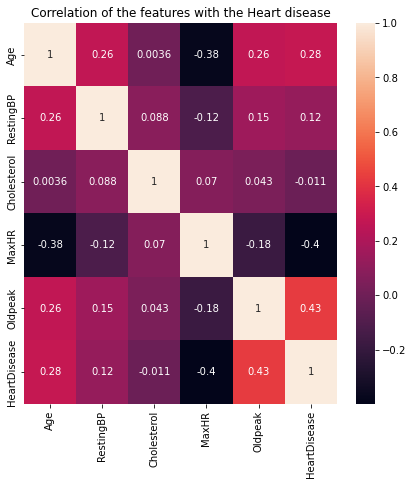

In [28]:
cor = heart.corr()
plt.figure(figsize=(7,7))
sns.heatmap(cor, annot=True);
plt.title('Correlation of the features with the Heart disease');

We can see from above that your chance of having heart disease is correlated with OldPeak and Age, and reverse correlated with MaxHR.

# Encoding

In [56]:
heart['AgeGroup']= np.nan
heart.loc[(heart['Age']>=28) & (heart['Age']<35),'AgeGroup']='Young Adult' 
heart.loc[(heart['Age']>=35) & (heart['Age']<=64),'AgeGroup']='Adult'
heart.loc[heart['Age']>64,'AgeGroup']='Seniors'

In [57]:
heart.drop(['Age'], axis=1, inplace=True)

In [52]:
catcols = ['Sex', 'ChestPainType','FastingBS','RestingECG',
            'ExerciseAngina',  'ST_Slope','AgeGroup']

In [58]:
def Label_Encoding(df,feature):
    label_encoder = LabelEncoder()
    df[feature]= label_encoder.fit_transform(df[feature])

In [59]:
for i in catcols:
    Label_Encoding(heart,i)

# Scaling

In [62]:
numcols  = ['RestingBP','Cholesterol','MaxHR']

In [63]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

# Scale data
heart[numcols] = scaler.fit_transform(heart[numcols])

In [64]:
heart.head()

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
0,1,1,0.401172,0.928784,0,1,1.382943,0,0.0,2,0,0
1,0,2,1.516461,-1.004122,0,1,0.750940,0,1.0,1,1,0
2,1,1,-0.156473,0.822385,0,2,-1.540071,0,0.0,2,0,0
3,0,0,0.289643,-0.401197,0,1,-1.145069,1,1.5,1,1,0
4,1,2,0.958816,-0.738126,0,1,-0.592066,0,0.0,2,0,0


In [29]:
heart.skew()

Age            -0.193997
RestingBP       0.606269
Cholesterol     1.513897
FastingBS       1.301354
MaxHR          -0.138897
Oldpeak         1.138819
HeartDisease   -0.206962
dtype: float64

In [76]:
y, X = heart['HeartDisease'], heart.drop(columns='HeartDisease')
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

In [108]:
def evaluate(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)    
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))
    return acc

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [110]:
logreg = LogisticRegression()
logreg.fit(x_train_data, y_train_data)
logreg_acc = evaluate(logreg)

Accuracy: 0.8492647058823529
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       111
           1       0.89      0.84      0.87       161

    accuracy                           0.85       272
   macro avg       0.84      0.85      0.85       272
weighted avg       0.85      0.85      0.85       272

------
Assuming 1 as positive, we get:

True Positive: 136
True Negative: 95
False Positive: 16
False Negative: 25

Precision: 0.8947368421052632
Recall: 0.84472049689441
F1-Score: 0.8690095846645369


### Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt.fit(x_train_data, y_train_data)
dt_acc = evaluate(dt)

Accuracy: 0.8198529411764706
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       111
           1       0.87      0.82      0.84       161

    accuracy                           0.82       272
   macro avg       0.81      0.82      0.82       272
weighted avg       0.82      0.82      0.82       272

------
Assuming 1 as positive, we get:

True Positive: 132
True Negative: 91
False Positive: 20
False Negative: 29

Precision: 0.868421052631579
Recall: 0.8198757763975155
F1-Score: 0.8434504792332268


### K-Nearest Neighbor

In [112]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train_data, y_train_data)
knn_acc = evaluate(knn)

Accuracy: 0.8639705882352942
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       111
           1       0.89      0.88      0.88       161

    accuracy                           0.86       272
   macro avg       0.86      0.86      0.86       272
weighted avg       0.86      0.86      0.86       272

------
Assuming 1 as positive, we get:

True Positive: 141
True Negative: 94
False Positive: 17
False Negative: 20

Precision: 0.8924050632911392
Recall: 0.8757763975155279
F1-Score: 0.8840125391849529


In [114]:
def evaluate_recall(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    return recall


In [115]:
recall_dict = {
    'n':[],
    'recall':[]
}
for n in [3,5,7,9,11,13,15]:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train_data, y_train_data)
    recall = evaluate_recall(knn)
    recall_dict['n'].append(n)
    recall_dict['recall'].append(recall)
    
recall_df = pd.DataFrame(recall_dict)

In [116]:
recall_df

,n,recall
0,3,0.875776
1,5,0.838509
2,7,0.832298
3,9,0.844720
4,11,0.832298
5,13,0.819876
6,15,0.819876


### SVM

In [117]:
from sklearn.svm import SVC


svm = SVC(random_state=1)
svm.fit(x_train_data,y_train_data)
svm_acc = evaluate(svm)

Accuracy: 0.8639705882352942
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       111
           1       0.89      0.88      0.88       161

    accuracy                           0.86       272
   macro avg       0.86      0.86      0.86       272
weighted avg       0.86      0.86      0.86       272

------
Assuming 1 as positive, we get:

True Positive: 141
True Negative: 94
False Positive: 17
False Negative: 20

Precision: 0.8924050632911392
Recall: 0.8757763975155279
F1-Score: 0.8840125391849529


### Random Forest

In [120]:

random_forest = RandomForestClassifier(random_state = 1)
random_forest.fit(x_train_data, y_train_data) # silakan dilanjutkan

random_forest_acc = evaluate(random_forest, x_test_data, y_test_data)

Accuracy: 0.8860294117647058
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       111
           1       0.90      0.91      0.90       161

    accuracy                           0.89       272
   macro avg       0.88      0.88      0.88       272
weighted avg       0.89      0.89      0.89       272

------
Assuming 1 as positive, we get:

True Positive: 146
True Negative: 95
False Positive: 16
False Negative: 15

Precision: 0.9012345679012346
Recall: 0.906832298136646
F1-Score: 0.9040247678018576


# Summary

In [122]:
data={'Estimators':['Logistic Regression', 'K-Nearest Neighbor', 'Decision Tree','Support Vector Machine', 'Random Forest'],
      'Accuracy':[logreg_acc,knn_acc,dt_acc,svm_acc,random_forest_acc]}

data =pd.DataFrame(data)

data.sort_values('Accuracy', ascending=False) 

,Estimators,Accuracy
4,Random Forest,0.886029
1,K-Nearest Neighbor,0.863971
3,Support Vector Machine,0.863971
0,Logistic Regression,0.849265
2,Decision Tree,0.819853
